In [21]:
#import pandas as pd

from sklearn.datasets import load_iris


In [22]:
iris = load_iris()

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# create data frame

import pandas as pd

iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

iris_df['target'] = iris.target

iris_df.loc[iris_df['target']==0 , "species"] = "setosa"
iris_df.loc[iris_df['target']==1 , "species"] = "versicolor"
iris_df.loc[iris_df['target']==2 , "species"] = "virginica"



In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.shape

(150, 5)

### Scatter plot 

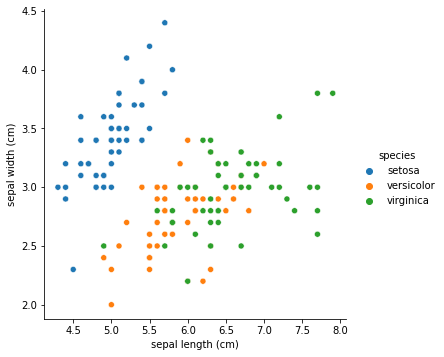

In [27]:
import seaborn as sns


sns.pairplot(x_vars=['sepal length (cm)'], y_vars=['sepal width (cm)'], data=iris_df, hue="species", height=5)


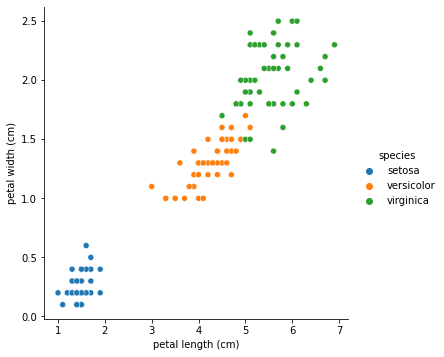

In [28]:
sns.pairplot(x_vars=['petal length (cm)'], y_vars=['petal width (cm)'], data=iris_df, hue="species", height=5)

### Train and test split

In [29]:
from sklearn.model_selection import train_test_split

x = iris_df.drop(['target','species'],axis='columns')
y = iris_df.target

x_train , x_test, y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=1)

In [33]:
y_train

91     1
135    2
69     1
128    2
114    2
      ..
133    2
137    2
72     1
140    2
37     0
Name: target, Length: 120, dtype: int32

### KNN using sklearn

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
knn.score(x_test,y_test)

1.0

### Hypertunning

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    
    'n_neighbors' : [3,4,5,6,7,8,9,10] 
}

grid_cv = GridSearchCV(KNeighborsClassifier(), param_grid).fit(x_train, y_train)


In [47]:
grid_cv.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [48]:
knn_model1 = KNeighborsClassifier(n_neighbors=7)

In [49]:
knn_model1.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [50]:
knn_model1.score(x_test,y_test)

0.9666666666666667

### Predict and confusion matrix

In [51]:
y_pred = knn_model1.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix

In [58]:
cmatrix = confusion_matrix(y_test,y_pred) 

Text(42.0, 0.5, 'Truth')

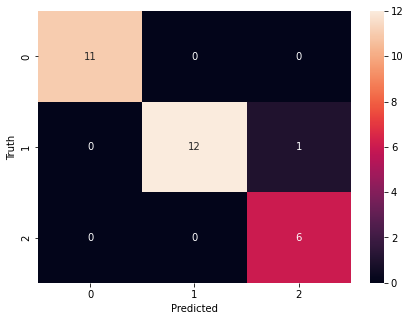

In [59]:
import matplotlib.pylab as plt

plt.figure(figsize=(7,5))
sns.heatmap(cmatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')